In [65]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [66]:
with open("C://Users//Eddie//Downloads//UNZIP_FOR_NOTEBOOKS_FINAL//DATA/Ames_Housing_Feature_Description.txt", 'r') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [67]:
df = pd.read_csv("C:\\Users\\Eddie\\Downloads\\UNZIP_FOR_NOTEBOOKS_FINAL\\DATA\\My_version_ames.csv")

In [68]:
df = df.drop('Unnamed: 0', axis = 1)

In [69]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [70]:
df = df.drop('PID', axis = 1)
# This is a unique identifier for the houses 
# however our index is a good enough unqiue identifier

In [71]:
len(df.columns)

80

In [72]:
df.isnull().sum()
# As we can see we're missing 490 Lot Frontage values but this number alone is not helpful 
# we want to see this number as a percentage of the total 

MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

In [73]:
100 * df.isnull().sum() / len(df)

MS SubClass        0.00000
MS Zoning          0.00000
Lot Frontage      16.74069
Lot Area           0.00000
Street             0.00000
                    ...   
Mo Sold            0.00000
Yr Sold            0.00000
Sale Type          0.00000
Sale Condition     0.00000
SalePrice          0.00000
Length: 80, dtype: float64

In [74]:
def percent_missing(df):
    # generalized function that returns the percentage of missing values for each column in data set
    percentNaN = 100 * df.isnull().sum() / len(df)
    percentNaN = percentNaN[percentNaN > 0].sort_values()
    
    return percentNaN

In [75]:
percent_nan = percent_missing(df)

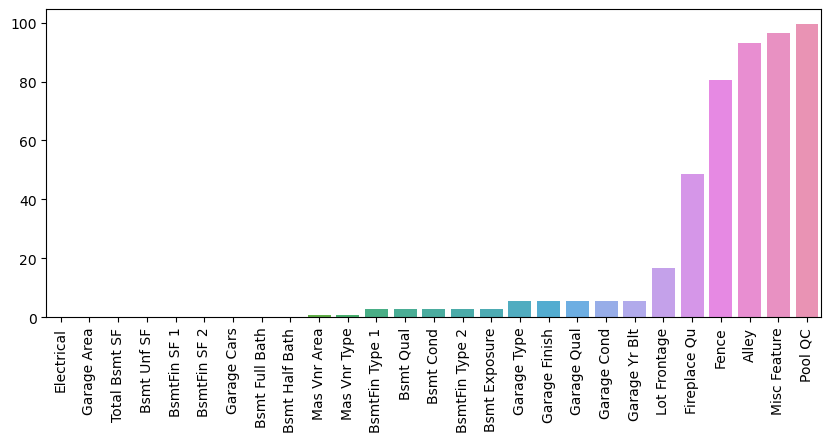

In [76]:
plt.figure(figsize = (10,4))
sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90)
plt.show()

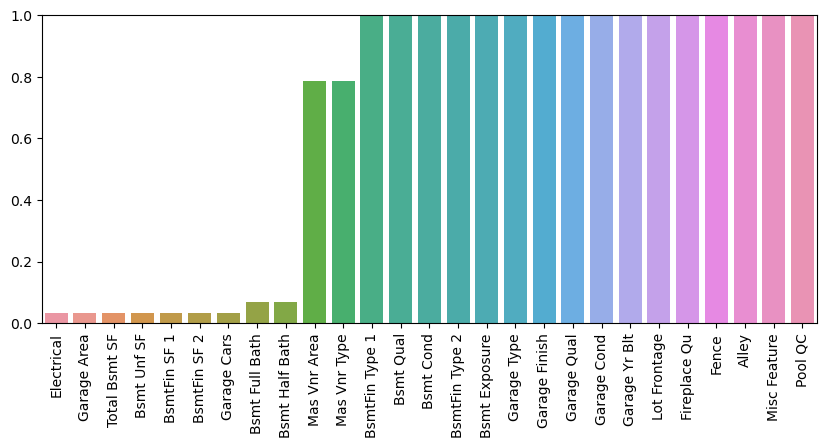

In [77]:
# in the cases of just a few rows missing feature data we have the option to either drop those rows
# or supply reasonable assumptions
plt.figure(figsize = (10,4))
sns.barplot(x = percentnan.index, y = percentnan)
plt.xticks(rotation = 90)
plt.ylim(0,1)
plt.show()
# Here we are thinking about dropping the rows that are less than 1% of the data
# We want to see which rows are missing the smallest missing data features

In [78]:
percentnan[percentnan < 1]
# We want to look at the low percent feature missing columns

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

In [79]:
df[df['Electrical'].isnull()]['Garage Area']

1576    400.0
Name: Garage Area, dtype: float64

In [80]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [81]:
df = df.dropna(axis = 0, subset = ['Electrical', 'Garage Cars'])

In [82]:
percent_nan = percent_missing(df)

In [83]:
percent_nan[percent_nan < 1]

Bsmt Unf SF       0.034188
Total Bsmt SF     0.034188
BsmtFin SF 2      0.034188
BsmtFin SF 1      0.034188
Bsmt Full Bath    0.068376
Bsmt Half Bath    0.068376
Mas Vnr Type      0.786325
Mas Vnr Area      0.786325
dtype: float64

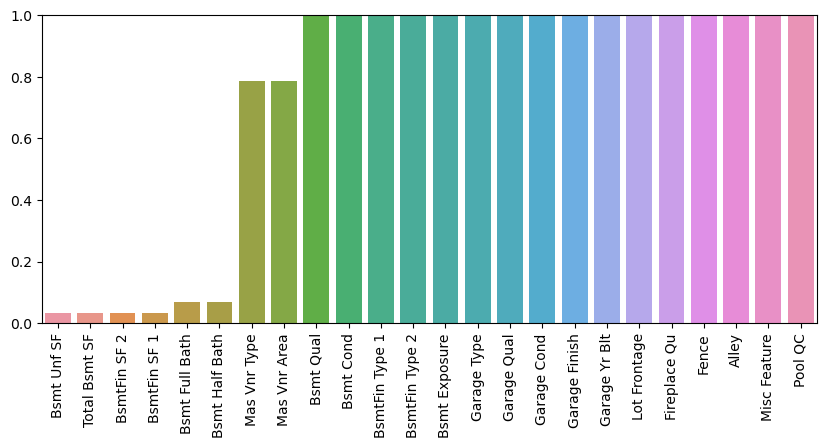

In [84]:
plt.figure(figsize = (10,4))
sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90)
plt.ylim(0,1)
plt.show()

In [85]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [86]:
df[df['Bsmt Full Bath'].isnull()]
# Notice these are the same rows
# We could drop these rows OR we could check our text description of the data to see if NaN means no basement
# It does!
# we will change all null basement values to 0 

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [87]:
# BSMT Numeric columns
bsmt_numeric_columns = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath','Bsmt Half Bath']
df[bsmt_numeric_columns] = df[bsmt_numeric_columns].fillna(0)
# BSMT String columns

bsmt_string_columns = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2']
df[bsmt_string_columns] = df[bsmt_string_columns].fillna("None")

In [88]:
df[df['Bsmt Full Bath'].isnull()]


,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


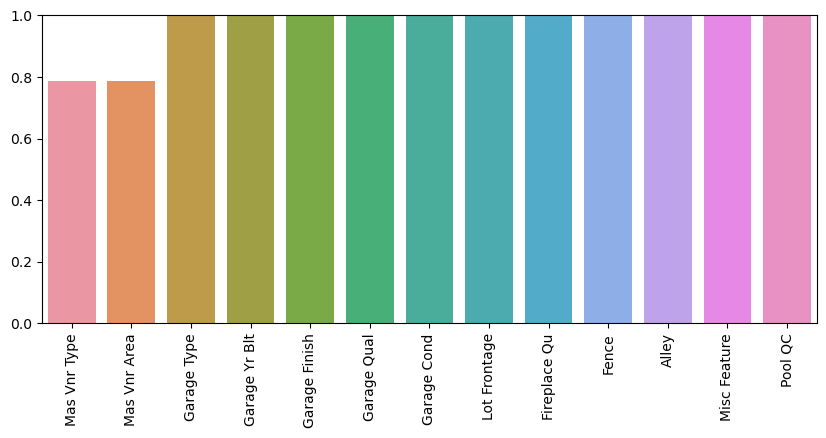

In [89]:
percent_nan = percent_missing(df)

plt.figure(figsize = (10,4))
sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90)
plt.ylim(0,1)
plt.show()

In [90]:
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna('None')

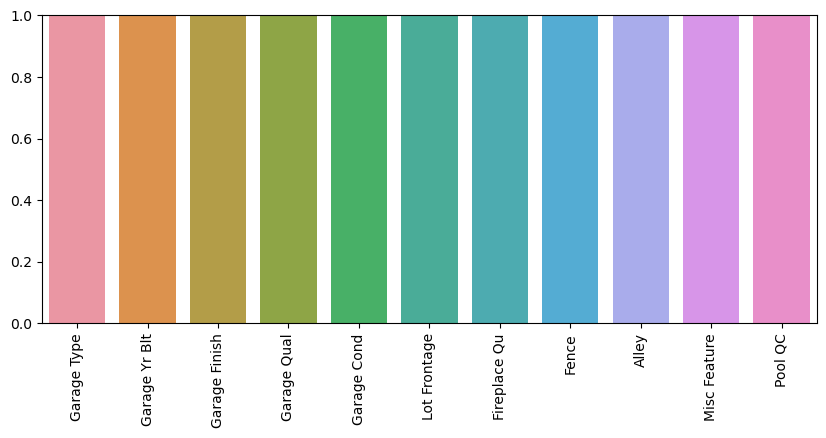

In [91]:

percent_nan = percent_missing(df)

plt.figure(figsize = (10,4))
sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90)
plt.ylim(0,1)
plt.show()



In [92]:

# We've dealt with all the data that was below our threshold of 1 
# Now we will need to take a column based approach to the remaining data

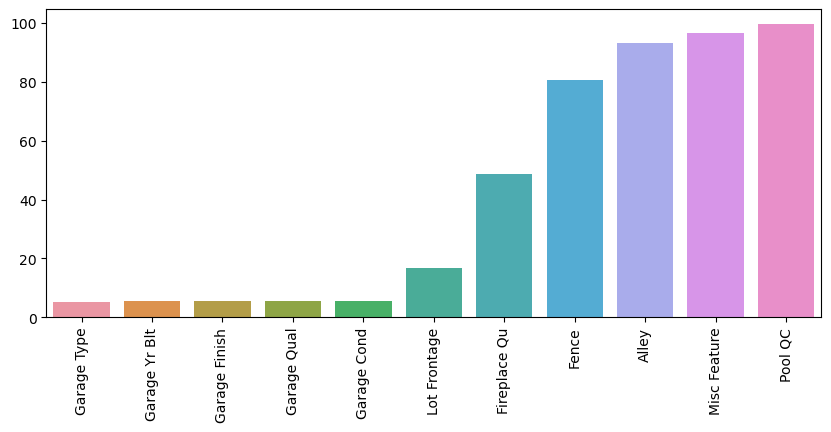

In [93]:
plt.figure(figsize = (10,4))
sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90)
plt.show()

In [94]:
# We can see that all of the garage features are the same percentage
# In the text file we can see that garage = NaN means no garage
gar_string_columns = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[gar_string_columns] = df[gar_string_columns].fillna('None')

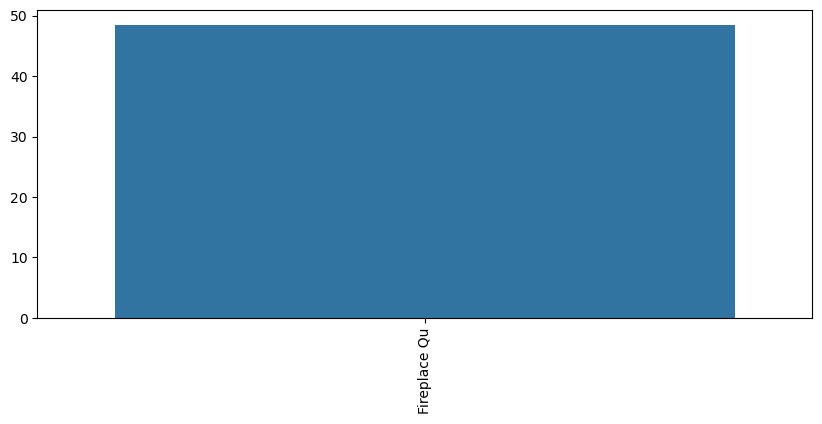

In [126]:
percent_nan = percent_missing(df)
plt.figure(figsize = (10,4))
sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90)
plt.show()

In [98]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)
# We are assuming that the garage yr built null values are associated with the houses that don't have garages
# Therefore we give it a value of 0
# no real 'Right way' to fill these missing values

In [107]:
#df = df.drop(['Pool QC','Misc Feature','Alley'], axis = 1)

In [105]:
df = df.drop(['Fence'], axis =1)

In [108]:
# Now we just have to deal with the last two problematic columns
df['Fireplace Qu'].value_counts()
# These are string values so we will fill the nulls with 'None'

Gd    741
TA    600
Fa     75
Po     46
Ex     43
Name: Fireplace Qu, dtype: int64

In [129]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')

In [130]:
df['Lot Frontage'].value_counts()

60.0                                                                                                         276
80.0                                                                                                         137
70.0                                                                                                         133
50.0                                                                                                         116
75.0                                                                                                         105
                                                                                                            ... 
119.0                                                                                                          1
137.0                                                                                                          1
25.0                                                                                            

<AxesSubplot:xlabel='Lot Frontage', ylabel='Neighborhood'>

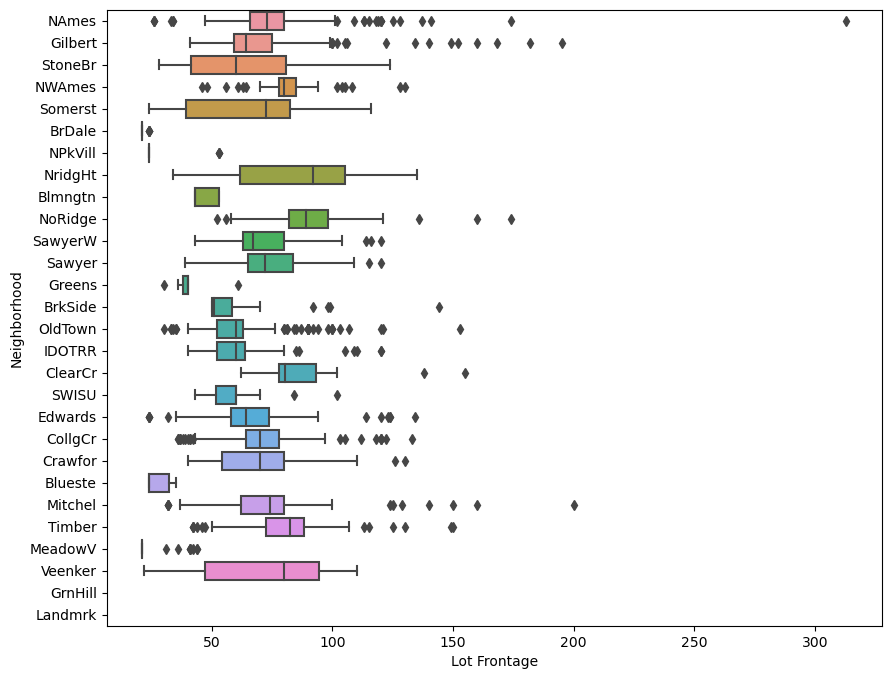

In [117]:
# We are going to make the assumption that the neighborhood the house is in relates to the value of Lot Frontage
plt.figure(figsize = (10,8))
sns.boxplot(data = df, x = 'Lot Frontage', y = 'Neighborhood')

In [120]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [124]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value: value.fillna(value.mean))
# Go through data frame 
# If you're missing a value for lot frontage 
# fill that value with the mean grouped by neighborhood


In [125]:
percent_nan = percent_missing(df)

MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
                 ..
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
FirePlace Qu      0
Length: 77, dtype: int64

In [133]:
df = df.drop('FirePlace Qu', axis = 1)